In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time


visualization of mandelbrot set

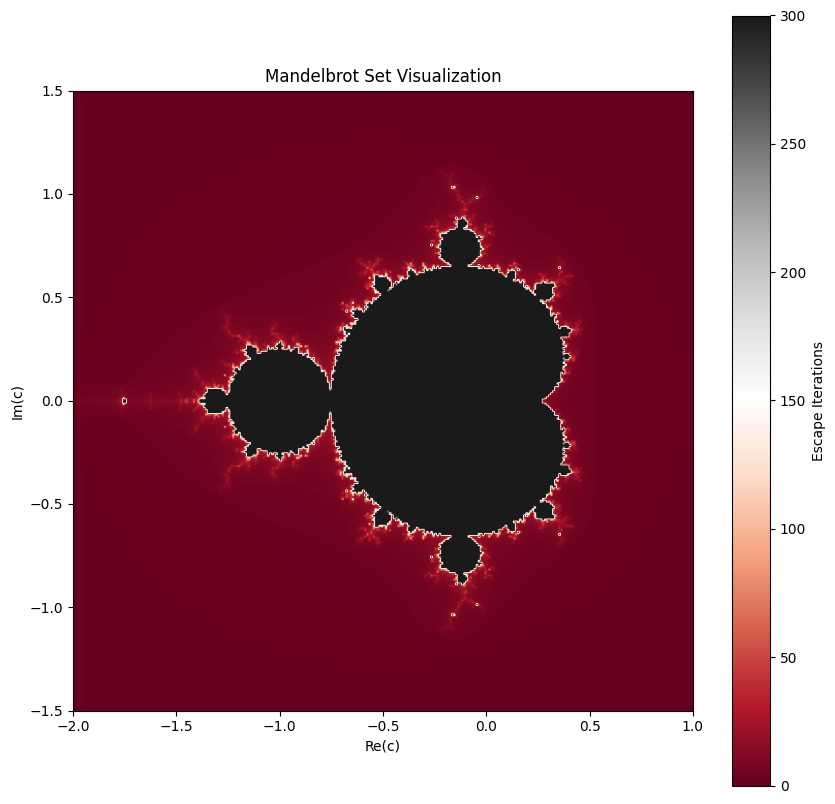

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
width = 300
height = 300
max_iter=300

# arrays of evenly spaced real and imaginary values
real = np.linspace(-2, 1, width)
im = np.linspace(-1.5, 1.5, height)

# meshgrid from the real and imaginary arrays
real_grid, imag_grid = np.meshgrid(real, im)

# Combine into a complex array
array = real_grid + 1j * imag_grid
result=np.zeros((height,width),int)
for i in range(height):
    for j in range(width):
        c=array[i,j]
        z=0
        count=0
        for k in range(max_iter):
            z=z**2+c
            count+=1
            if np.abs(z)>2:
                break
            result[i,j]=count

# Plot the result array with a colormap
plt.figure(figsize=(10, 10))
plt.imshow(result, cmap='RdGy', extent=(-2, 1, -1.5, 1.5), origin='lower')
plt.colorbar(label="Escape Iterations")
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")
plt.title("Mandelbrot Set Visualization")
plt.show()

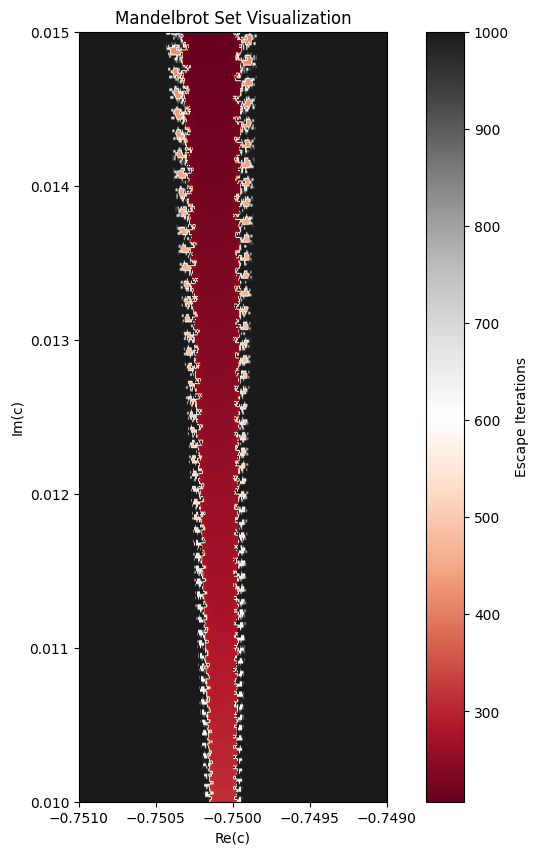

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
width = 300
height = 300
max_iter=1000

Remin = -0.7510
Remax = -0.7490
Immin = 0.01
Immax = 0.015
# arrays of evenly spaced real and imaginary values
real2 = np.linspace(Remin, Remax, width)
im2 = np.linspace(Immin, Immax, height)

# meshgrid from the real and imaginary arrays
real_grid2, imag_grid2 = np.meshgrid(real2, im2)

# Combine into a complex array
array2 = real_grid2 + 1j * imag_grid2
result2=np.zeros((height,width),int)
for i in range(height):
    for j in range(width):
        c=array2[i,j]
        z=0
        count=0
        for k in range(max_iter):
            z=z**2+c
            count+=1
            if np.abs(z)>2:
                break
            result2[i,j]=count

# Plot the result array with a colormap
plt.figure(figsize=(10, 10))
plt.imshow(result2, cmap='RdGy', extent=(Remin, Remax, Immin, Immax), origin='lower')
plt.colorbar(label="Escape Iterations")
plt.xlabel("Re(c)")
plt.ylabel("Im(c)")
plt.title("Mandelbrot Set Visualization")
plt.show()

# Question 2

In [ ]:
N = 100000#numbr of samples
max_iter = 100#max iterations
counter = 0

for i in range(N):
    c = complex(np.random.uniform(-2, 2), np.random.uniform(-2, 2))
    z = 0


    for n in range(max_iter):
        z = z**2 + c
        if abs(z) > 2:
            break

    else :
        counter += 1
proportion_of_points= counter/N
area=16*proportion_of_points
print(area)

1.53968


In [ ]:
def Mandel_area(N,max_iter):
    counter = 0

    for i in range(N):
        c = complex(np.random.uniform(-2, 2), np.random.uniform(-2, 2))
        z = 0

        for n in range(max_iter):
            z = z**2 + c
            if abs(z) > 2:
                break

        else :
            counter += 1
    proportion_of_points= counter/N
    area=16*proportion_of_points
    return area

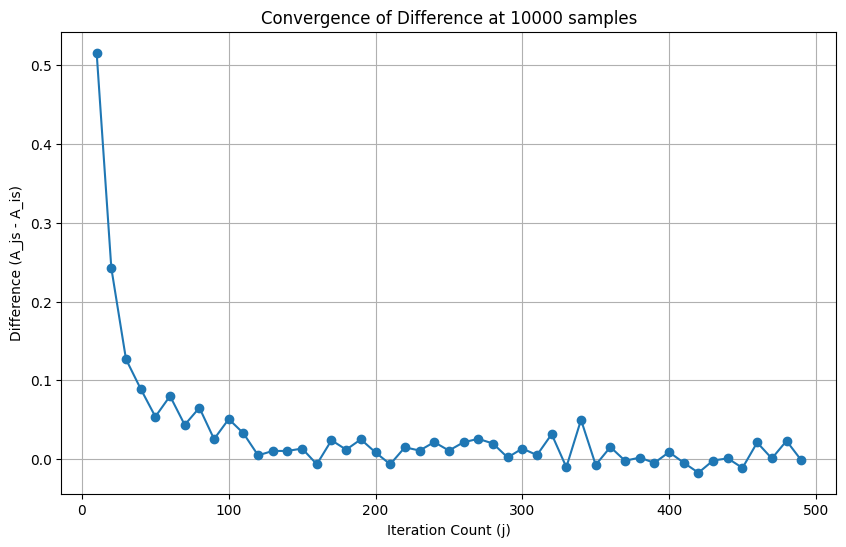

In [ ]:
N = 100000  # samples
i = 500  # iteration count
A_is = 1.514
areas = []
differences = []

# A_js for j < i
for j in range(10, i, 10):
    area_j = Mandel_area(N, j)
    areas.append(area_j)
    differences.append(area_j - A_is)

#plot
j_values = range(10, i, 10)
plt.figure(figsize=(10, 6))
plt.plot(j_values, differences, marker='o', linestyle='-')
plt.xlabel("Iteration Count (j)")
plt.ylabel("Difference (A_js - A_is)")
plt.title("Convergence of Difference at 10000 samples")
plt.grid()
plt.show()

1.5515195195195195


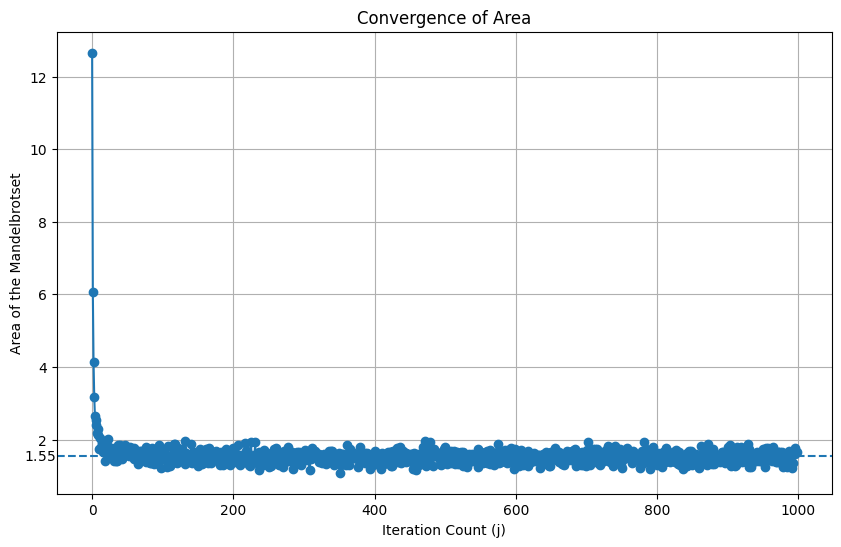

In [ ]:
#also a plot of the area's itself
all_areas = []
for j in range(1, 1000):
    area_j = Mandel_area(1000, j)
    all_areas.append(area_j)

print(np.mean(all_areas))
tick = float(round(np.mean(all_areas),2))

plt.figure(figsize=(10, 6))
plt.plot(all_areas, marker='o', linestyle='-')
plt.xlabel("Iteration Count (j)")
plt.ylabel("Area of the Mandelbrotset")
plt.axhline(np.mean(all_areas), linestyle='--')
plt.text(-52, np.mean(all_areas), f"${tick:.2f}$", ha="right", va="center")
plt.title("Convergence of Area")
plt.grid()
plt.show()

# Different Sampling Methods

Pure random sampling

In [ ]:
import numpy as np
import math
from scipy.stats import norm

# Function for pure random sampling
def pure_random_sampling(nb_samples, itermax):
    """
    This function estimates the area of Mandelbrot with pure random sampling.

    Parameters:
        nb_samples: Total number of points that we will sample.
        itermax: The maximum number of iterations that we can use to test the divergence.

    Returns:
        Estimated area of the Mandelbrot set.
    """
    # Counter for points in the Mandelbrot set
    counter = 0

    for _ in range(nb_samples):
        c = complex(np.random.uniform(-2, 2), np.random.uniform(-2, 2))
        z = 0
        for _ in range(itermax):
            z = z**2 + c
            if abs(z) > 2:
                break
        else:
            counter += 1

    # Compute the estimated area
    proportion = counter / nb_samples
    area = 16 * proportion

    return area

# Function to compute mean and variance
def compute_varandmean(method_func, N, max_iter, runs):
    """
    Compute mean and variance for a given method function.

    Parameters:
        method_func: The function to estimate the area (e.g., pure_random_sampling).
        N: Number of samples.
        max_iter: Maximum number of iterations.
        runs: Number of runs to perform.

    Returns:
        Tuple containing the mean and variance.
    """
    areas = [method_func(N, max_iter) for _ in range(runs)]
    variance = np.var(areas, ddof=1)  # Sample variance
    mean = np.mean(areas)
    return mean, variance

# Function to compute confidence interval
def conf_int(mean, var, runs, p=0.95):
    """
    Compute the confidence interval for the given mean and variance.

    Parameters:
        mean: Mean of the sample.
        var: Variance of the sample.
        runs: Number of runs.
        p: Confidence level (default: 0.95).

    Returns:
        Confidence interval ( tuple).
    """
    z_value = norm.ppf((p + 1) / 2)  # Critical z-value
    std_dev = math.sqrt(var)         # Standard deviation
    margin_of_error = z_value * std_dev / math.sqrt(runs)  # Margin of error
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    return lower_bound, upper_bound

#My Parameters
nb_samples = 10000
itermax = 500
runs = 30

# Calculate mean and variance for pure random sampling :
pr_mean, pr_var = compute_varandmean(pure_random_sampling, nb_samples, itermax, runs)

# Calculate confidence interval :
ci_lower, ci_upper = conf_int(pr_mean, pr_var, runs, p=0.95)

print(f"Pure Random Sampling Mean Area: {pr_mean:.4f}")
print(f"Pure Random Sampling Variance: {pr_var:.4e}")
print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")


Pure Random Sampling Mean Area: 1.5047
Pure Random Sampling Variance: 1.5764e-03
95% Confidence Interval: [1.4905, 1.5190]


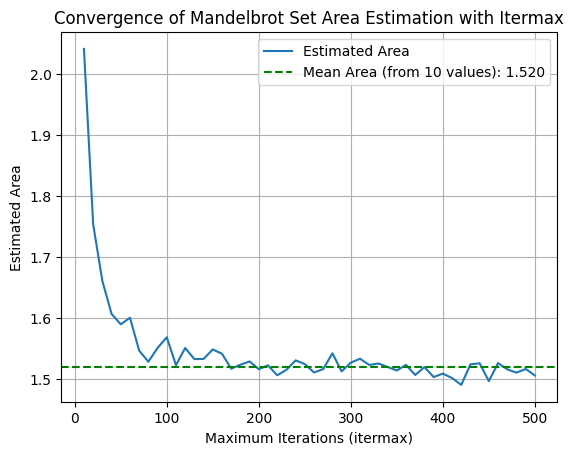

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def pure_random_sampling_fixed_samples(nb_samples, itermax):
    """
    Estimates the area of the Mandelbrot set for a fixed number of random samples and a given itermax.

    Parameters:
        nb_samples: Total number of points to sample.
        itermax: Maximum number of iterations to test for divergence.

    Returns:
        Estimated area of the Mandelbrot set.
    """
    counter = 0

    for _ in range(nb_samples):
        c = complex(np.random.uniform(-2, 2), np.random.uniform(-2, 2))
        z = 0
        for _ in range(itermax):
            z = z**2 + c
            if abs(z) > 2:
                break
        else:
            counter += 1

    # Compute the estimated area
    proportion = counter / nb_samples
    area = 16 * proportion

    return area

# My parameters
nb_samples = 100000  # Fixed number of random samples
itermax_values = range(10, 510, 10)
areas = []

# We compute area for each itermax
for itermax in itermax_values:
    area = pure_random_sampling_fixed_samples(nb_samples, itermax)
    areas.append(area)

# Stabilized mean area (ignore the first 10 values)
stable_start = 10  # Ignore the first 10 itermax values
mean_area = np.mean(areas[stable_start:])

# Plotting the results
plt.plot(itermax_values, areas, label="Estimated Area")
plt.axhline(y=mean_area, color="green", linestyle="--", label=f"Mean Area (from {stable_start} values): {mean_area:.3f}")
plt.xlabel("Maximum Iterations (itermax)")
plt.ylabel("Estimated Area")
plt.title("Convergence of Mandelbrot Set Area Estimation with Itermax")
plt.legend()
plt.grid()
plt.show()

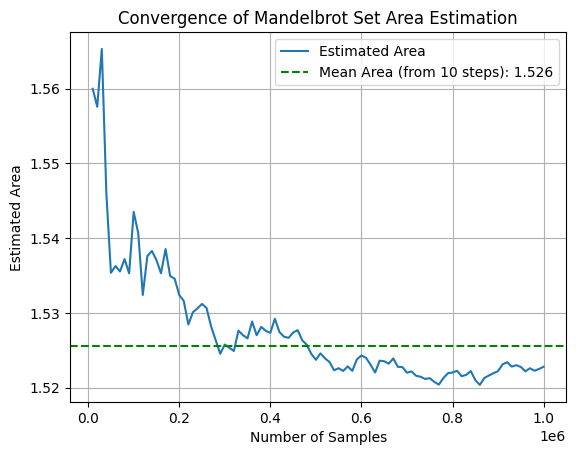

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def pure_random_sampling_convergence(nb_samples, itermax, step=10000):
    """
    Estimates the area of the Mandelbrot set with pure random sampling and tracks convergence.

    Parameters:
        nb_samples: Total number of points to sample.
        itermax: Maximum number of iterations to test for divergence.
        step: Interval to record intermediate results for convergence tracking.

    Returns:
        area: Estimated area.
        convergence: List of estimated areas at every step.
    """
    counter = 0
    convergence = []

    for i in range(1, nb_samples + 1):
        c = complex(np.random.uniform(-2, 2), np.random.uniform(-2, 2))
        z = 0
        for _ in range(itermax):
            z = z**2 + c
            if abs(z) > 2:
                break
        else:
            counter += 1

        #Record data
        if i % step == 0:
            proportion = counter / i
            estimated_area = 16 * proportion
            convergence.append(estimated_area)

    #Estimated area
    proportion = counter / nb_samples
    area = 16 * proportion

    return area, convergence

#My parameters
nb_samples = 1000000
itermax = 500
step = 10000
stable_start = 10 #We decided to skip over the 10 first, so we avoid the fluctuations.

#
estimated_area, convergence = pure_random_sampling_convergence(nb_samples, itermax, step)

#Calculate the mean average, so we can have a reference
mean_area = np.mean(convergence[stable_start:])

#Plotting convergence
x = np.arange(step, nb_samples + step, step)
plt.plot(x, convergence, label="Estimated Area")
plt.axhline(y=mean_area, color="green", linestyle="--", label=f"Mean Area (from {stable_start} steps): {mean_area:.3f}")
plt.xlabel("Number of Samples")
plt.ylabel("Estimated Area")
plt.title("Convergence of Mandelbrot Set Area Estimation")
plt.legend()
plt.grid()
plt.show()



Orthogonal Sampling

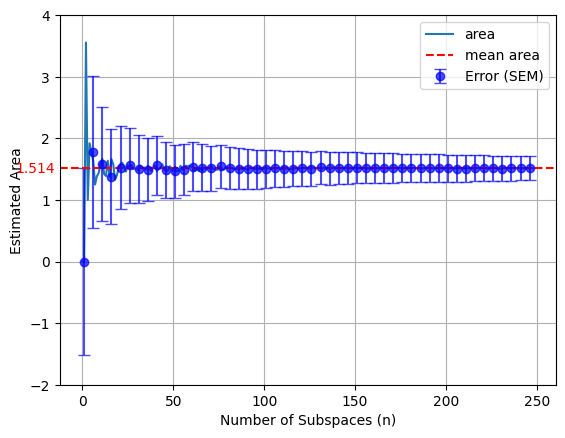

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

def orthogonal_sampling(a,b,c,d, no_of_subspaces): #effectively it will be no_of_subspaces^2
  #we will divide the rectangle (a,b) for Re-axis and (c,d) for the Im-axis in n subspaces and then take a sample in every subspace
  step_x = (b-a)/no_of_subspaces
  step_y = (d-c)/no_of_subspaces
  orthogonal_samples = []

  #sample a random coordinate in all subspaces:
  for i in range(no_of_subspaces):
    for j in range(no_of_subspaces):
      x_coord = a + (i + np.random.uniform()) * step_x
      y_coord = c + (j + np.random.uniform()) * step_y
      orthogonal_samples.append((x_coord, y_coord))

  return orthogonal_samples

#function to check if point is inside the set:
def is_in_set(c, max_iter):
    z = 0
    for n in range(max_iter):
        z = z**2 + c
        if abs(z) > 2:
            return n #stop iterating after it has escaped convergence radius and return number of iterations
    return max_iter #otherwise return the maximum number of iterations

area_per_no_of_subspaces = []
for subspaces in range(1,250):
    samples = orthogonal_sampling(a=-2, b=2, c=-2, d=2, no_of_subspaces=subspaces)
    samples = np.array(samples)

    inside = []
    for x, y in samples:
        c = complex(x, y)
        n_iter = is_in_set(c, max_iter=500)
        if n_iter == 500:
            inside.append((x, y))

    #area:
    sample_area = (2 - (-2)) * (2 - (-2))
    orthogonal_area = (len(inside) / len(samples)) * sample_area
    area_per_no_of_subspaces.append(orthogonal_area)

area_per_no_of_subspaces = np.array(area_per_no_of_subspaces)
mean_area2 = np.mean(area_per_no_of_subspaces[50:])

sem_list = []
true_area = 1.514
for j in range(1, len(area_per_no_of_subspaces) + 1):
    mse_j = np.mean((area_per_no_of_subspaces[:j] - true_area) ** 2)
    sem_j = np.sqrt(mse_j)
    sem_list.append(sem_j)


plt.plot(area_per_no_of_subspaces, label="area")
plt.errorbar(np.arange(1,250)[::5], area_per_no_of_subspaces[::5], yerr=np.array(sem_list)[::5], fmt='o', color='blue', ecolor='blue', capsize=4, alpha=0.7, label='Error (SEM)')
yticks = plt.yticks()[0]
yticks = yticks[yticks != 1.50]
plt.yticks(yticks)
plt.axhline(mean_area2, label="mean area", color='red', linestyle='--')
plt.text(x=-15, y=mean_area2, s=f'{mean_area2:.3f}', color='red', va='center', ha='right', fontsize=10)
plt.xlabel("Number of Subspaces (n)")
plt.ylabel("Estimated Area")
# plt.suptitle("Convergence of Area (Orthogonal sampling)")
# plt.title("First run")
plt.grid()
plt.legend()
plt.show()


In [ ]:
# Function to estimate area using orthogonal sampling
def estimate_area(N, max_iter):
    samples = orthogonal_sampling(a=-2, b=2, c=-2, d=2, no_of_subspaces=N)
    samples = np.array(samples)

    inside = []
    for x, y in samples:
        c = complex(x, y)
        n_iter = is_in_set(c, max_iter=max_iter)
        if n_iter == max_iter:
            inside.append((x, y))

    # Area calculation
    sample_area = (2 - (-2)) * (2 - (-2))
    orthogonal_area = (len(inside) / len(samples)) * sample_area
    return orthogonal_area

# Number of samples, iterations and runs
N = 1000
max_iter = 500
runs = 30

# Getting mean and variance
os_mean, os_var = compute_varandmean(estimate_area, N, max_iter, runs)

# Getting the confidence interval
ci_lower, ci_upper = conf_int(os_mean, os_var, runs, p=0.95)

# Displaying the results
print(f"OS Mean Area: {os_mean:.4f}")
print(f"OS Variance: {os_var:.4e}")
print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")


Latin Hypercube

In [ ]:
# latin hyper cube
import numpy as np
def lhs_area(N, max_iter):
    #counter to count how many points remain in the Mandelbrot set
    counter = 0
    samples = N

    #defining the real and imaginary axes and dividing into strata
    realaxis = np.linspace(-2, 2, samples)
    imaginaryaxis = np.linspace(-2, 2, samples)

    storage_real = []
    storage_imaginary = []

    #getting random points within each stratum for both axes
    for i in range(samples-1):
        # Select a random point in the real-axis stratum
        start_real = realaxis[i]
        end_real = realaxis[i + 1]
        randompoint_real = np.random.uniform(start_real, end_real)

        # Select a random point in the imaginary-axis stratum
        start_imag = imaginaryaxis[i]
        end_imag = imaginaryaxis[i + 1]
        randompoint_imaginary = np.random.uniform(start_imag, end_imag)

        # Store for later
        storage_real.append(randompoint_real)
        storage_imaginary.append(randompoint_imaginary)

    #shuffle the points within each axis independently to create randomized strata combinations
    np.random.shuffle(storage_real)
    np.random.shuffle(storage_imaginary)

    #combine the shuffled real and imaginary parts into complex numbers
    lhs_samples = np.array(storage_real) + 1j * np.array(storage_imaginary)

    # Check whether each sampled point belongs to the Mandelbrot set
    for i in range(N-1):
        c = lhs_samples[i]
        z = 0

        #Mandelbrot iteration for the current point
        for n in range(max_iter):
            z = z**2 + c
            if abs(z) > 2:  # If the point escapes stop
                break
        else:  #if the point does not escape, it is in the set
            counter += 1

    #the area by scaling the proportion of points in the set
    proportion_of_points = counter / N
    area = 16 * proportion_of_points  # The total area of the region [-2, 2] x [-2, 2] is 16
    return area



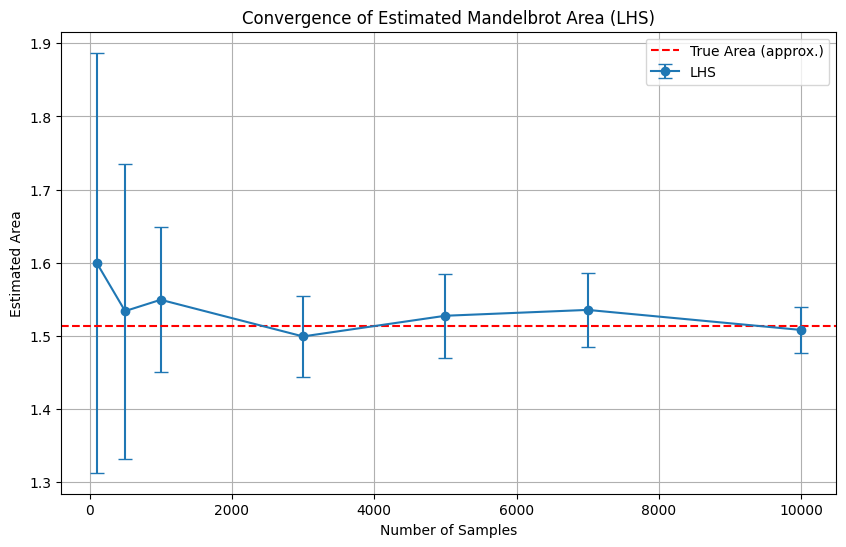

In [ ]:
# Parameters
import matplotlib.pyplot as plt

#true area of mandelbrot set
true_area = 1.514

#parameters for the number of iterations, samples, and runs
max_iter = 500
sample_sizes = [100, 500, 1000, 3000, 5000, 7000, 10000]
runs = 30

#storage for results
mean_areas = []
mse_errors = []

# Run simulations
for s in sample_sizes:
    areas = [lhs_area(s, max_iter) for i in range(runs)]
    mean_areas.append(np.mean(areas))
    mse = np.mean([(a - true_area)**2 for a in areas])
    mse_errors.append(np.sqrt(mse))  # Root Mean Squared Error for error bars

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(sample_sizes, mean_areas, yerr=mse_errors, fmt='o-', capsize=5, label='LHS')
plt.axhline(y=true_area, color='r', linestyle='--', label='True Area (approx.)')
plt.xlabel('Number of Samples')
plt.ylabel('Estimated Area')
plt.title('Convergence of Estimated Mandelbrot Area (LHS)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
#FUNCTIONS FOR VARIANCE MEAN AND CONFIDENCE INTERVALS
import numpy as np
import math
from scipy.stats import norm

#function to get mean and variance
def compute_varandmean(method_func, N, max_iter, runs):
    areas = [method_func(N, max_iter) for _ in range(runs)]
    variance = np.var(areas)
    mean = np.mean(areas)
    return mean, variance

#function to get confidence interval
def conf_int(mean, var, runs, p=0.95):
    z_value = norm.ppf((p + 1) / 2)  # Critical z-value
    std_dev = math.sqrt(var)         # Standard deviation
    margin_of_error = z_value * std_dev / math.sqrt(runs)  # Margin of error
    lower_bound = mean - margin_of_error
    upper_bound = mean + margin_of_error
    return lower_bound, upper_bound

# number of samples, iterations and runs
N = 10000
max_iter = 500
runs = 30

#getting mean and variance
lhs_mean, lhs_var = compute_varandmean(lhs_area, N, max_iter, runs)

#getting the confidence interval
ci_lower, ci_upper = conf_int(lhs_mean, lhs_var, runs, p=0.95)

#displaying the results
print(f"LHS Mean Area: {lhs_mean:.4f}")
print(f"LHS Variance: {lhs_var:.4e}")
print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")

LHS Mean Area: 1.5187
LHS Variance: 1.7557e-03
95% Confidence Interval: [1.5037, 1.5337]


Antithetic

In [ ]:
import numpy as np
def antithetic_area(N, max_iter):
    xmin, xmax = -2, 2
    ymin, ymax = -2, 2
    counter = 0
    for i in range(N):
        # Generate random sample within bounds
        x_sample = np.random.uniform(xmin, xmax)
        y_sample = np.random.uniform(ymin, ymax)
        c = x_sample + 1j * y_sample

        # Compute region-centered antithetic counterpart
        ax_sample = (xmin + xmax) - x_sample
        ay_sample = (ymin + ymax) - y_sample
        antithetic_c = ax_sample + 1j * ay_sample


        z = 0
        z_anti = 0

        # Mandelbrot membership test
        for n in range(max_iter):
            z = z**2 + c
            z_anti = z_anti**2 + antithetic_c
            if abs(z) > 2 or abs(z_anti) > 2:
                break
        else:
            # Both points are inside the Mandelbrot set
            counter += 2

    # Calculate area
    proportion_of_points = counter / N
    area = 16 * proportion_of_points  # Total area of the sampling region is 16
    return area
antithetic_area(100000,500)

# Calculate mean and variance for zzzz :
pr_mean, pr_var = compute_varandmean(antithetic_area, nb_samples, itermax, runs)

# Calculate confidence interval :
ci_lower, ci_upper = conf_int(pr_mean, pr_var, runs, p=0.95)

print(f"Pure Random Sampling Mean Area: {pr_mean:.4f}")
print(f"Pure Random Sampling Variance: {pr_var:.4e}")
print(f"95% Confidence Interval: [{ci_lower:.4f}, {ci_upper:.4f}]")


Pure Random Sampling Mean Area: 1.6299
Pure Random Sampling Variance: 3.8672e-05
95% Confidence Interval: [1.6277, 1.6321]


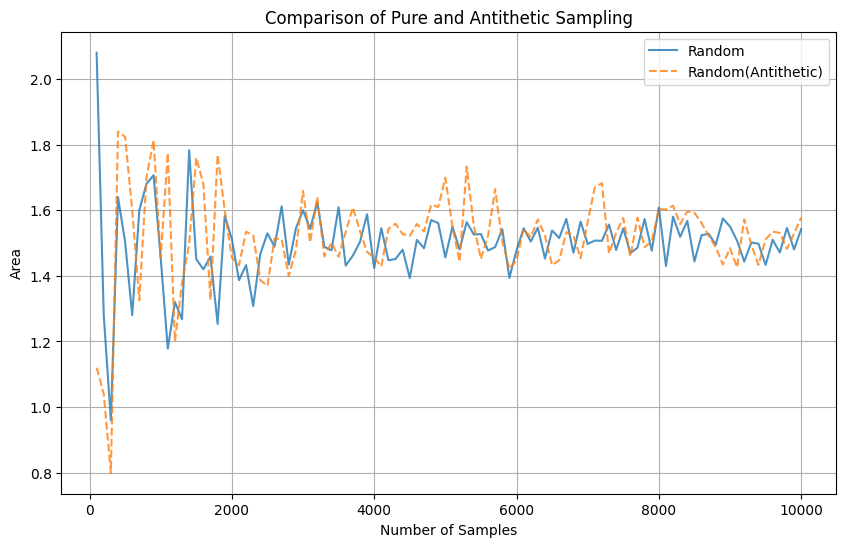

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def pure_random_sampling(N, max_iter):
    """
    Estimates the area of the Mandelbrot set using pure random sampling.
    """
    counter = 0
    xmin, xmax = -2, 2
    ymin, ymax = -2, 2

    for _ in range(N):
        x_sample = np.random.uniform(xmin, xmax)
        y_sample = np.random.uniform(ymin, ymax)
        c = x_sample + 1j * y_sample

        z = 0
        for n in range(max_iter):
            z = z**2 + c
            if abs(z) > 2:
                break
        else:
            counter += 1

    proportion_of_points = counter / N
    area = 16 * proportion_of_points
    return area

def antithetic_area(N, max_iter):
    """
    Estimates the area of the Mandelbrot set using antithetic variables.
    """
    xmin, xmax = -2, 2
    ymin, ymax = -2, 2
    counter = 0

    for _ in range(N // 2):  #Only half since each pair is going to generate two points
        x_sample = np.random.uniform(xmin, xmax)
        y_sample = np.random.uniform(ymin, ymax)
        c = x_sample + 1j * y_sample

        # Generate the antithetic variable
        ax_sample = (xmin + xmax) - x_sample
        ay_sample = (ymin + ymax) - y_sample
        antithetic_c = ax_sample + 1j * ay_sample

        #To test if both points belong to the mandelbrodt set
        z, z_anti = 0 + 0j, 0 + 0j
        is_inside = [True, True]
        for n in range(max_iter):
            z = z**2 + c if abs(z) <= 2 else z
            z_anti = z_anti**2 + antithetic_c if abs(z_anti) <= 2 else z_anti

            if abs(z) > 2:
                is_inside[0] = False
            if abs(z_anti) > 2:
                is_inside[1] = False

            if not any(is_inside):
                break

        counter += sum(is_inside)

    proportion_of_points = counter / N
    area = 16 * proportion_of_points
    return area

#My Parameters
sample_sizes = range(100, 10100, 100)
max_iter = 500

# Compute areas for pure and antithetic sampling
pure_areas = [pure_random_sampling(N, max_iter) for N in sample_sizes]
antithetic_areas = [antithetic_area(N, max_iter) for N in sample_sizes]

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, pure_areas, label="Random", linestyle="-", alpha=0.8)
plt.plot(sample_sizes, antithetic_areas, label="Random(Antithetic)", linestyle="--", alpha=0.8)
plt.xlabel("Number of Samples")
plt.ylabel("Area")
plt.title("Comparison of Pure and Antithetic Sampling")
plt.legend()
plt.grid()
plt.show()
